#Face Recognition

## Problem

##Imports

In [ ]:
from os import listdir
from PIL import Image as PImage
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# drive.mount("/content/drive")
path = "/content/drive/MyDrive/Pattern Recognition/faces/"

##Download Dataset and Understand the Format

In [ ]:
foldersList = listdir(path)
loadedImages = []
for folder in foldersList :
    imagesList = listdir(path+folder)
    for image in imagesList:
        img = PImage.open(path +folder+'/'+ image)
        loadedImages.append(img)

## Generate the Data Matrix and the Label Vector

In [ ]:
# Reshape into matrix 40*10
images = np.array(loadedImages).reshape(-1,10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The input object of type 'PpmImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PpmImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
dataMatrixD = np.zeros(10304*400).reshape(-1,10304)
i=0
j=0
labels = np.zeros(400)
for image in loadedImages:
  dataMatrixD[i] = np.array(image).flatten()
  if(i%10 == 0):
    j = j+1
  labels[i] = j
  i = i + 1

In [ ]:
print(loadedImages)

[<PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F4572A910>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F4BBE1490>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F4BD76350>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F45707E10>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F45711A50>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F4569A6D0>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F4569AAD0>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F4569AC90>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F456A1310>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F45711A90>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F49996E50>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F49996D10>, <PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x

In [ ]:
print(loadedImages[0])

<PIL.PpmImagePlugin.PpmImageFile image mode=L size=92x112 at 0x7F8F4572A910>


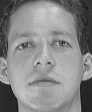

In [ ]:
loadedImages[0]

In [ ]:
print(dataMatrixD.shape)
print(labels.shape)

(400, 10304)
(400,)


In [ ]:
print(dataMatrixD)

[[ 41.  47.  47. ...  35.  37.  38.]
 [ 48.  49.  45. ...  47.  46.  46.]
 [ 43.  50.  41. ... 158. 153. 169.]
 ...
 [157. 152. 154. ... 111. 108. 109.]
 [139. 143. 146. ...  83.  81.  74.]
 [155. 154. 154. ... 111. 111. 108.]]


## Split the Dataset into Training and Test sets

In [ ]:
bonus = False
if not bonus:
  train_x = np.zeros(200*10304).reshape(-1,10304)
  test_x = np.zeros(200*10304).reshape(-1,10304)
  train_y = np.zeros(200)
  test_y = np.zeros(200)
  even=0
  odd=0
  for i in range(400):
    if i%2==0:
      test_x[even] = dataMatrixD[i]
      test_y[even] = labels[i]
      even += 1 
    else:
      train_x[odd] = dataMatrixD[i]
      train_y[odd] = labels[i]
      odd += 1
else:
  train_x = np.zeros(280*10304).reshape(-1,10304)
  test_x = np.zeros(120*10304).reshape(-1,10304)
  train_y = np.zeros(280)
  test_y = np.zeros(120)
  train=0
  test=0
  for i in range(0,400,10):
    train_x[train:train+7] = dataMatrixD[i:i+7]
    test_x[test:test+3] = dataMatrixD[i+7:i+10]
    train_y[train:train+7] = labels[i:i+7]
    test_y[test:test+3] = labels[i+7:i+10]
    test += 3
    train += 7

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(200, 10304)
(200,)
(200, 10304)
(200,)


## Classification using PCA

### Mean

In [ ]:
# Compute Mean
mean = np.mean(train_x, axis=0)
print(mean)

[84.795 84.595 84.89  ... 77.01  75.69  75.115]


### Center Data

In [ ]:
# Center Data
centeredData = train_x - mean
print(centeredData)

[[-36.795 -35.595 -39.89  ... -30.01  -29.69  -29.115]
 [-21.795 -31.595 -49.89  ... -36.01  -65.69  -51.115]
 [-24.795 -24.595 -22.89  ... -45.01  -41.69  -41.115]
 ...
 [ 68.205  67.405  67.11  ...  32.99   32.31   38.885]
 [ 72.205  67.405  69.11  ...  33.99   32.31   33.885]
 [ 70.205  69.405  69.11  ...  33.99   35.31   32.885]]


### Covariance Matrix

In [ ]:
# Covariance
cov_matrix = np.cov(centeredData,rowvar=False, bias=True)
print(cov_matrix)

[[1321.332975 1306.101975 1302.98245  ... -181.11795  -129.63855
   -97.346425]
 [1306.101975 1308.060975 1296.69545  ... -182.50095  -127.61555
   -96.328425]
 [1302.98245  1296.69545  1301.2079   ... -160.3389   -103.9541
   -82.98735 ]
 ...
 [-181.11795  -182.50095  -160.3389   ... 2265.0299   2030.6281
  1874.48385 ]
 [-129.63855  -127.61555  -103.9541   ... 2030.6281   2061.5939
  1917.38065 ]
 [ -97.346425  -96.328425  -82.98735  ... 1874.48385  1917.38065
  2049.341775]]


### EigenValues & EigenVectors

In [ ]:
# Compute EigenValues
eig_val, eig_vect = np.linalg.eig(cov_matrix)
print("Eigen Values:")
print(eig_val)
print("Eigen Vectors")
print(eig_vect)

### Eigen Matrix

In [ ]:
eig_matrix = np.diag(eig_val)
print("Eigen Matrix:")
print(eig_matrix)

Eigen Matrix:
[[2.76060815e+06+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 2.12438539e+06+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  1.06826515e+06+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 ...
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 2.32002391e-13-9.94067286e-14j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
  4.29897386e-13+0.00000000e+00j 0.00000000e+00+0.00000000e+0

In [ ]:
# Compute EigenValues --> eigh guarantees sorting
eig_val2, eig_vect2 = np.linalg.eigh(cov_matrix)
print("Eigen Values:")
print(eig_val2)
print("Eigen Vectors")
print(eig_vect2)

Eigen Values:
[-1.80159538e-09 -1.49490753e-09 -1.19499726e-09 ...  1.12493407e+06
  2.15867218e+06  2.80969734e+06]
Eigen Vectors
[[ 0.         -0.          0.         ... -0.0173559  -0.01403503
   0.00181274]
 [-0.30842475 -0.33739462 -0.18499528 ... -0.01747265 -0.01408952
   0.00172616]
 [ 0.12090075 -0.35515342  0.15644399 ... -0.01732967 -0.0140813
   0.00185274]
 ...
 [-0.01051069 -0.01123883 -0.01423857 ... -0.01578498  0.01049765
   0.00751084]
 [ 0.01023603  0.00384396  0.0125115  ... -0.01650226  0.00988605
   0.0067441 ]
 [-0.00600516 -0.01809787  0.00654238 ... -0.01628143  0.00878801
   0.00761984]]


In [ ]:
desc_eig_val2 = np.flip(eig_val2, axis= 0)
desc_eig_vect2 = np.flip(eig_vect2, axis = 1)
print("Sorted EigenValues 2")
print(desc_eig_val2)
print("Sorted EigenVectors 2")
print(desc_eig_vect2)

Sorted EigenValues 2
[ 2.80969734e+06  2.15867218e+06  1.12493407e+06 ... -1.19499726e-09
 -1.49490753e-09 -1.80159538e-09]
Sorted EigenVectors 2
[[ 0.00181274 -0.01403503 -0.0173559  ...  0.         -0.
   0.        ]
 [ 0.00172616 -0.01408952 -0.01747265 ... -0.18499528 -0.33739462
  -0.30842475]
 [ 0.00185274 -0.0140813  -0.01732967 ...  0.15644399 -0.35515342
   0.12090075]
 ...
 [ 0.00751084  0.01049765 -0.01578498 ... -0.01423857 -0.01123883
  -0.01051069]
 [ 0.0067441   0.00988605 -0.01650226 ...  0.0125115   0.00384396
   0.01023603]
 [ 0.00761984  0.00878801 -0.01628143 ...  0.00654238 -0.01809787
  -0.00600516]]


### Fraction of Total Variance

In [ ]:
alpha = [0.8, 0.85, 0.9, 0.95]
dimensions = []
for a in alpha:
  dim = 0
  total = 0
  for eig in desc_eig_val2:
    total += eig
    dim += 1
    if (total/desc_eig_val2.sum())>a:
      dimensions.append(dim)
      break
print(dimensions)

[40, 60, 92, 149]


### Alpha aganist Dimensions

Text(0, 0.5, 'alpha')

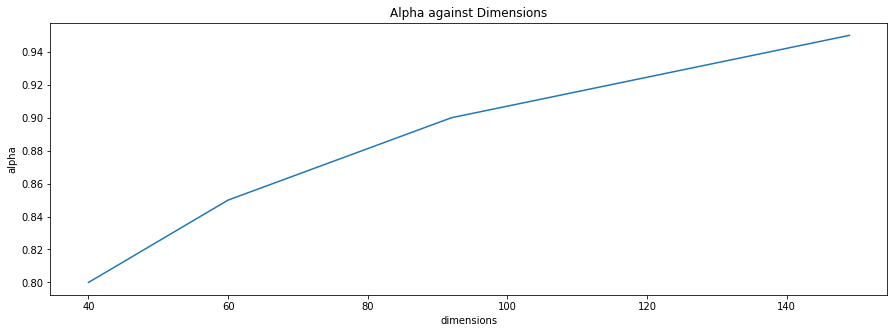

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(dimensions,alpha)
plt.title("Alpha against Dimensions")
plt.xlabel("dimensions")
plt.ylabel("alpha")

### Projection Matrix

In [ ]:
projection_matrix_a1 = desc_eig_vect2[:,0:dimensions[0]]
projection_matrix_a2 = desc_eig_vect2[:,0:dimensions[1]]
projection_matrix_a3 = desc_eig_vect2[:,0:dimensions[2]]
projection_matrix_a4 = desc_eig_vect2[:,0:dimensions[3]]

In [ ]:
dimensions[3]

115

In [ ]:
projection_matrix_a1.shape

(10304, 36)

### Reduce Training Set

In [ ]:
projected_matrix_a1 = np.dot(np.transpose(projection_matrix_a1),np.transpose(centeredData))
projected_matrix_a2 = np.dot(np.transpose(projection_matrix_a2),np.transpose(centeredData))
projected_matrix_a3 = np.dot(np.transpose(projection_matrix_a3),np.transpose(centeredData))
projected_matrix_a4 = np.dot(np.transpose(projection_matrix_a4),np.transpose(centeredData))

In [ ]:
projected_matrix_a4.shape

(115, 200)

### Reduce Testing Set

In [ ]:
mean_test = np.mean(test_x, axis=0)
centeredData_test = test_x - mean_test

In [ ]:
projected_matrix_test_a1 = np.dot(np.transpose(projection_matrix_a1),np.transpose(centeredData_test))
projected_matrix_test_a2 = np.dot(np.transpose(projection_matrix_a2),np.transpose(centeredData_test))
projected_matrix_test_a3 = np.dot(np.transpose(projection_matrix_a3),np.transpose(centeredData_test))
projected_matrix_test_a4 = np.dot(np.transpose(projection_matrix_a4),np.transpose(centeredData_test))

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
def knn(train_x_in, train_y_in, test_x_in, test_y_in, k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_x_in,train_y_in)
  pred_y=knn.predict(test_x_in)
  accuracy=accuracy_score(test_y_in, pred_y) * 100
  return accuracy


In [ ]:
kk = [1, 3, 5, 7]

In [ ]:

accuracies = []
accuracy = []

for k in kk:
  accuracy.append(knn(np.transpose(projected_matrix_a1), train_y, np.transpose(projected_matrix_test_a1),test_y, k))
  accuracy.append(knn(np.transpose(projected_matrix_a2), train_y, np.transpose(projected_matrix_test_a2),test_y, k))
  accuracy.append(knn(np.transpose(projected_matrix_a3), train_y, np.transpose(projected_matrix_test_a3),test_y, k))
  accuracy.append(knn(np.transpose(projected_matrix_a4), train_y, np.transpose(projected_matrix_test_a4),test_y, k))
  accuracies.append(accuracy)
  accuracy = []

In [ ]:
print(accuracies)

[[97.5, 97.5, 96.66666666666667, 96.66666666666667], [95.83333333333334, 98.33333333333333, 97.5, 97.5], [91.66666666666666, 92.5, 93.33333333333333, 93.33333333333333], [87.5, 88.33333333333333, 89.16666666666667, 87.5]]


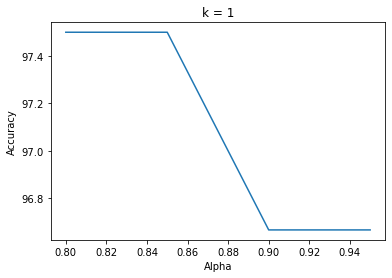

Accuracy at k=1, dim=40, alpha=0.8 = 97.5 %
Accuracy at k=1, dim=60, alpha=0.85 = 97.5 %
Accuracy at k=1, dim=92, alpha=0.9 = 96.66666666666667 %
Accuracy at k=1, dim=149, alpha=0.95 = 96.66666666666667 %
---------------------------------------------------------------


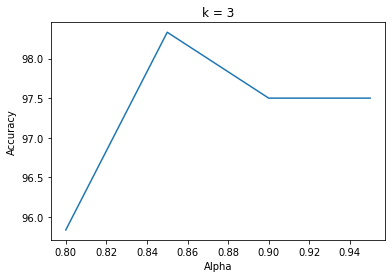

Accuracy at k=3, dim=40, alpha=0.8 = 95.83333333333334 %
Accuracy at k=3, dim=60, alpha=0.85 = 98.33333333333333 %
Accuracy at k=3, dim=92, alpha=0.9 = 97.5 %
Accuracy at k=3, dim=149, alpha=0.95 = 97.5 %
---------------------------------------------------------------


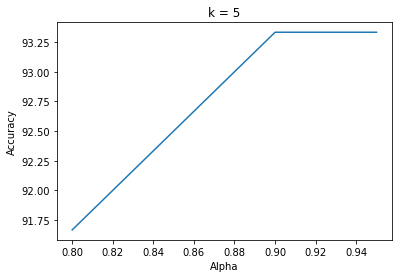

Accuracy at k=5, dim=40, alpha=0.8 = 91.66666666666666 %
Accuracy at k=5, dim=60, alpha=0.85 = 92.5 %
Accuracy at k=5, dim=92, alpha=0.9 = 93.33333333333333 %
Accuracy at k=5, dim=149, alpha=0.95 = 93.33333333333333 %
---------------------------------------------------------------


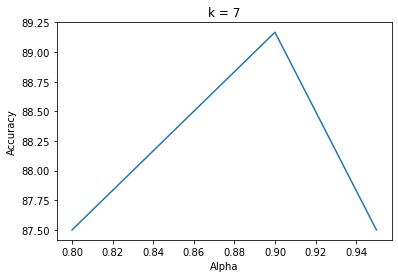

Accuracy at k=7, dim=40, alpha=0.8 = 87.5 %
Accuracy at k=7, dim=60, alpha=0.85 = 88.33333333333333 %
Accuracy at k=7, dim=92, alpha=0.9 = 89.16666666666667 %
Accuracy at k=7, dim=149, alpha=0.95 = 87.5 %
---------------------------------------------------------------


In [ ]:
# Plot Alpha against Accuracy at Constant K
for i in range(len(accuracies[0])): 
  plt.title(f'k = {kk[i]}')
  plt.plot(alpha,accuracies[i])
  plt.xlabel('Alpha')
  plt.ylabel('Accuracy')
  plt.show()
  for j in range(len(accuracies[0])):
    print(f'Accuracy at k={kk[i]}, dim={dimensions[j]}, alpha={alpha[j]} = {accuracies[i][j]} %')
  print('---------------------------------------------------------------')

In [ ]:
[i[0] for i in accuracies]

[97.5, 95.83333333333334, 91.66666666666666, 87.5]

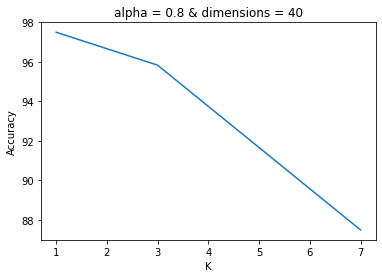

Accuracy at k=1, dim=40, alpha=0.8 = 97.5 %
Accuracy at k=3, dim=40, alpha=0.8 = 95.83333333333334 %
Accuracy at k=5, dim=40, alpha=0.8 = 91.66666666666666 %
Accuracy at k=7, dim=40, alpha=0.8 = 87.5 %
---------------------------------------------------------------


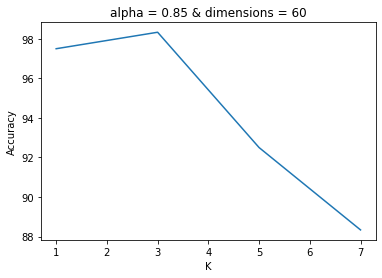

Accuracy at k=1, dim=60, alpha=0.85 = 97.5 %
Accuracy at k=3, dim=60, alpha=0.85 = 98.33333333333333 %
Accuracy at k=5, dim=60, alpha=0.85 = 92.5 %
Accuracy at k=7, dim=60, alpha=0.85 = 88.33333333333333 %
---------------------------------------------------------------


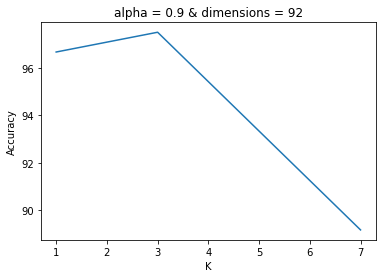

Accuracy at k=1, dim=92, alpha=0.9 = 96.66666666666667 %
Accuracy at k=3, dim=92, alpha=0.9 = 97.5 %
Accuracy at k=5, dim=92, alpha=0.9 = 93.33333333333333 %
Accuracy at k=7, dim=92, alpha=0.9 = 89.16666666666667 %
---------------------------------------------------------------


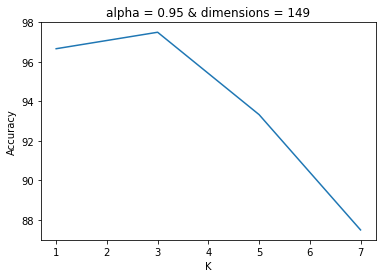

Accuracy at k=1, dim=149, alpha=0.95 = 96.66666666666667 %
Accuracy at k=3, dim=149, alpha=0.95 = 97.5 %
Accuracy at k=5, dim=149, alpha=0.95 = 93.33333333333333 %
Accuracy at k=7, dim=149, alpha=0.95 = 87.5 %
---------------------------------------------------------------


In [ ]:
# Plot K against Accuracy at contant Alpha & Dimensions
for i in range(len(kk)): 
  plt.title(f'alpha = {alpha[i]} & dimensions = {dimensions[i]}')
  plt.plot(kk,[j[i] for j in accuracies])
  plt.xlabel('K')
  plt.ylabel('Accuracy')
  plt.show()
  for j in range(len(kk)):
    print(f'Accuracy at k={kk[j]}, dim={dimensions[i]}, alpha={alpha[i]} = {accuracies[j][i]} %')
  print('---------------------------------------------------------------')

Conclusion. Principal Component Analysis (PCA) is very useful to speed up the computation by reducing the dimensionality of the data. Plus, when you have high dimensionality with high correlated variable of one another, the PCA can improve the accuracy of classification model

However, Using PCA can lose some spatial information which is important for classification, so the classification accuracy decreases.

PCA can help us improve performance at a very low cost of model accuracy. Other benefits of PCA include reduction of noise in the data, feature selection (to a certain extent), and the ability to produce independent, uncorrelated features of the data.

## Classification Using LDA

### Mean

In [ ]:
mean_vect = np.zeros(40*10304).reshape(-1,10304)
i = 0
for j in range(0,200,5):
  mean_vect[i] = np.mean(train_x[j:j+5],axis=0)
  i += 1
print(mean_vect.shape)
print(mean_vect)

(40, 10304)
[[ 51.4  49.2  43.6 ...  41.   35.2  36.4]
 [120.8 120.6 121.4 ...  77.4  77.8  76.4]
 [ 52.8  56.8  57.6 ...  40.4  44.4  43.2]
 ...
 [127.4 122.6 125.6 ...  56.6  58.8  59.4]
 [ 84.4  85.   83.8 ... 122.6 122.6 118.8]
 [153.2 151.2 151.8 ... 102.6 103.  103.8]]


In [ ]:
mean_overall = np.mean(train_x,axis=0)
print(mean_overall.shape)
print(mean_overall)

(10304,)
[84.795 84.595 84.89  ... 77.01  75.69  75.115]


### Between Class Scatter Matrix Sb

In [ ]:
Sb = 0
Nk = 5
for i in range(40):
  Sb += Nk*np.dot(np.transpose(np.matrix(mean_vect[i]-mean_overall)),np.matrix((mean_vect[i]-mean_overall)))

In [ ]:
print(Sb.shape)
print(Sb)

(10304, 10304)
[[234863.795 232573.795 232094.49  ... -35854.79  -27192.11  -20100.685]
 [232573.795 231050.195 230231.29  ... -34881.39  -27013.71  -19881.885]
 [232094.49  230231.29  230174.38  ... -32170.98  -23273.22  -16339.47 ]
 ...
 [-35854.79  -34881.39  -32170.98  ... 336561.98  324371.42  319641.57 ]
 [-27192.11  -27013.71  -23273.22  ... 324371.42  320927.58  317650.73 ]
 [-20100.685 -19881.885 -16339.47  ... 319641.57  317650.73  319537.955]]


### Center Data

In [ ]:
Zs = np.zeros(200*10304).reshape(-1,10304)
j = 0
for i in range(200):
  Zs[i] = train_x[i] - mean_vect[j]
  if i%5==0 and i!=0:
    j += 1

In [ ]:
print(Zs.shape)
print(Zs)

(200, 10304)
[[ -3.4  -0.2   1.4 ...   6.   10.8   9.6]
 [ 11.6   3.8  -8.6 ...   0.  -25.2 -12.4]
 [  8.6  10.8  18.4 ...  -9.   -1.2  -2.4]
 ...
 [ -0.2   0.8   0.2 ...   7.4   5.   10.2]
 [  3.8   0.8   2.2 ...   8.4   5.    5.2]
 [  1.8   2.8   2.2 ...   8.4   8.    4.2]]


### Scatter Matrix

In [ ]:
Ss = np.zeros(10304*10304).reshape(10304,10304)
j = 0
for i in range(0,200,5):
  Ss += np.dot(np.transpose(Zs[i:i+5,:]),Zs[i:i+5,:])
  j += 1

In [ ]:
print(Ss.shape)
print(Ss)

(10304, 10304)
[[110440.92 110371.64 108738.88 ... -21613.52 -14737.52 -12395.6 ]
 [110371.64 113363.6  110206.36 ... -25231.12 -17333.36 -14958.68]
 [108738.88 110206.36 109752.92 ... -20855.48 -13497.28 -13602.2 ]
 ...
 [-21613.52 -25231.12 -20855.48 ... 239200.64 199249.4  162036.52]
 [-14737.52 -17333.36 -13497.28 ... 199249.4  209341.24 175559.88]
 [-12395.6  -14958.68 -13602.2  ... 162036.52 175559.88 193834.52]]


### EigenValues & EigenVectors

In [ ]:
eig_val_LDA, eig_vect_LDA = np.linalg.eigh(np.dot(np.linalg.pinv(Ss),Sb)) 

In [ ]:
desc_eig_val_LDA = np.flip(eig_val_LDA, axis= 0)
desc_eig_vect_LDA = np.flip(eig_vect_LDA, axis = 1)

In [ ]:
print(eig_val_LDA.shape)
print(eig_vect_LDA.shape)
print(eig_val_LDA)
print(eig_vect_LDA)

(10304,)
(10304, 10304)
[-8788.52397894 -1979.54997123 -1902.98948367 ...  2340.60321565
  3028.81723472 11834.24781989]
[[-0.01144939 -0.00547927  0.01682328 ... -0.00212797  0.02061376
  -0.01214962]
 [-0.01110326 -0.00528725  0.0162158  ... -0.00210292  0.02011337
  -0.01181519]
 [-0.01160026 -0.0050093   0.01638684 ... -0.0024122   0.02010082
  -0.01229229]
 ...
 [ 0.01689688  0.01605231  0.02217022 ...  0.02026882 -0.01204128
  -0.01832099]
 [ 0.01934799  0.01636692  0.0279037  ...  0.0236665  -0.01647265
  -0.02110408]
 [ 0.01310836  0.00776997  0.022066   ...  0.01449242 -0.01567316
  -0.01417878]]


In [ ]:
np.savetxt('eig_val_LDA.csv', eig_val, delimiter=',')

In [ ]:
np.savetxt('eig_vect_LDA.csv', eig_vect, delimiter=',')

In [ ]:
%cp -av "/content/eig_val_LDA.csv" "/content/drive/MyDrive/Pattern Recognition"
%cp -av "/content/eig_vect_LDA.csv" "/content/drive/MyDrive/Pattern Recognition"

'/content/eig_val_LDA.csv' -> '/content/drive/MyDrive/Pattern Recognition/eig_val_LDA.csv'
'/content/eig_vect_LDA.csv' -> '/content/drive/MyDrive/Pattern Recognition/eig_vect_LDA.csv'


In [ ]:
projection_matrix_LDA = eig_vect_LDA[:, :39]

### Reduce Training Set

In [ ]:
projected_train_x = np.dot(np.transpose(projection_matrix_LDA),np.transpose(train_x))

### Reduce Testing Set

In [ ]:
projected_test_x = np.dot(np.transpose(projection_matrix_LDA),np.transpose(test_x))

### KNN

In [ ]:
accuracy = []

for k in kk:
  accuracy.append(knn(np.transpose(projected_train_x), train_y, np.transpose(projected_test_x),test_y, k))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
print(accuracy)

[90.5, 84.5, 81.0, 75.5]


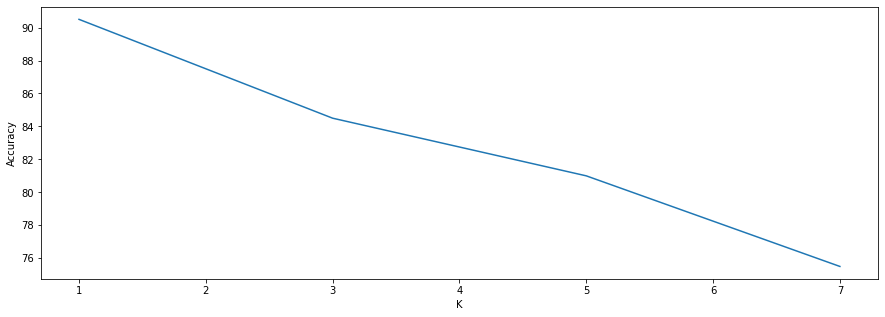

Accuracy at k=1 = 90.5 %
Accuracy at k=3 = 84.5 %
Accuracy at k=5 = 81.0 %
Accuracy at k=7 = 75.5 %
---------------------------------------------------------------


In [ ]:
# Plot K against Accuracy 
plt.figure(figsize=(15,5))
plt.plot(kk,accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
for j in range(len(kk)):
  print(f'Accuracy at k={kk[j]} = {accuracy[j]} %')
print('---------------------------------------------------------------')

## Compare Non-Face Images

In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

### Read Non-Faces Data

In [ ]:
NUM_NON_FACES = 200

In [ ]:
non_face_data = datasets.CIFAR10(
    root="data",
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified


In [ ]:
# 50k images with 32*32 bits
print(non_face_data.data.shape)

(50000, 32, 32, 3)


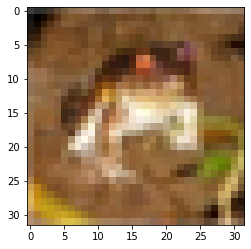

In [ ]:
plt.imshow(non_face_data.data[0])

In [ ]:
random = np.random.choice(49999,NUM_NON_FACES*2,replace=False)
non_faces_gray = np.array([resize(rgb2gray(img.reshape(32,32,3)),(92,112)) for img in non_face_data.data[random,:,:,:]])

In [ ]:
non_faces_gray[0].shape

(92, 112)

### Train Set

In [ ]:
non_faces_matrix_all = np.zeros(10304*NUM_NON_FACES*2).reshape(-1,10304)
non_faces_labels = np.zeros(NUM_NON_FACES)
faces_labels = np.ones(200)
for i in range(len(non_faces_gray)):
  non_faces_matrix_all[i] = np.array(non_faces_gray[i]).flatten()
non_faces_matrix = non_faces_matrix_all[:NUM_NON_FACES]
non_faces_matrix_test = non_faces_matrix_all[NUM_NON_FACES:]

In [ ]:
non_faces_matrix.shape

(200, 10304)

In [ ]:
labels_all = np.concatenate([faces_labels, non_faces_labels])

In [ ]:
labels_all.shape

(400,)

### LDA

#### Mean

In [ ]:
mean_vect = np.zeros(2*10304).reshape(-1,10304)

mean_vect[0] = np.mean(train_x[:200],axis=0)
mean_vect[1] = np.mean(non_faces_matrix[:NUM_NON_FACES],axis=0)

print(mean_vect.shape)
print(mean_vect)

(2, 10304)
[[84.795      84.595      84.89       ... 77.01       75.69
  75.115     ]
 [ 0.5305286   0.53064736  0.53058798 ...  0.49683409  0.49734688
   0.4963213 ]]


#### Between Class Scatter Matrix

In [ ]:
B = np.dot(np.transpose(np.matrix(mean_vect[0]-mean_vect[1])),np.matrix(mean_vect[0]-mean_vect[1]))
print(B.shape)
print(B)

(10304, 10304)
[[7100.50114067 7083.63823908 7108.5012618  ... 6447.34148073
  6336.06916815 6287.70351774]
 [7083.63823908 7066.81538501 7091.61936081 ... 6432.02976078
  6321.02170759 6272.77092023]
 [7108.5012618  7091.61936081 7116.51039665 ... 6454.60568811
  6343.20800523 6294.78786133]
 ...
 [6447.34148073 6432.02976078 6454.60568811 ... 5854.26455761
  5753.22794311 5709.31134371]
 [6336.06916815 6321.02170759 6343.20800523 ... 5753.22794311
  5653.93508264 5610.7764238 ]
 [6287.70351774 6272.77092023 6294.78786133 ... 5709.31134371
  5610.7764238  5567.94721158]]


#### Center Data

In [ ]:
Z1 = train_x - mean_vect[0]
Z2 = non_faces_matrix - mean_vect[1]

#### Scatter Matrix

In [ ]:
S1 = np.dot(np.transpose(np.matrix(Z1)),Z1)
S2 = np.dot(np.transpose(np.matrix(Z2)),Z2)
S = S1 + S2
print(S.shape)
print(S)

(10304, 10304)
[[264282.31490578 261236.22118147 260612.26304363 ... -36218.72560492
  -25922.83659602 -19464.42961381]
 [261236.22118147 261628.18516116 259354.99817131 ... -36495.25674929
  -25518.16386226 -19260.76463633]
 [260612.26304363 259354.99817131 260257.42060747 ... -32062.88117711
  -20785.91022914 -16592.58212507]
 ...
 [-36218.72560492 -36495.25674929 -32062.88117711 ... 453016.57766523
  406136.26876911 374907.31656135]
 [-25922.83659602 -25518.16386226 -20785.91022914 ... 406136.26876911
  412329.50170697 383486.70583124]
 [-19464.42961381 -19260.76463633 -16592.58212507 ... 374907.31656135
  383486.70583124 409878.87229146]]


#### EigenVectors & EigenValues

In [ ]:
eig_val_LDA, eig_vect_LDA = np.linalg.eigh(np.dot(np.linalg.pinv(S),B)) 

In [ ]:
desc_eig_val_LDA = np.flip(eig_val_LDA, axis= 0)
desc_eig_vect_LDA = np.flip(eig_vect_LDA, axis = 1)

In [ ]:
np.savetxt(f'eig_val_LDA_{NUM_NON_FACES}_Non-Face.csv', desc_eig_val_LDA, delimiter=',')
np.savetxt(f'eig_vect_LDA_{NUM_NON_FACES}_Non-Face.csv', desc_eig_vect_LDA, delimiter=',')

In [ ]:
%cp -av f"/content/eig_val_LDA_{NUM_NON_FACES}_Non-Face.csv" "/content/drive/MyDrive/Pattern Recognition"
%cp -av f"/content/eig_vect_LDA_{NUM_NON_FACES}_Non-Face.csv" "/content/drive/MyDrive/Pattern Recognition"

'/content/eig_val_LDA_200_Non-Face.csv' -> '/content/drive/MyDrive/Pattern Recognition/eig_val_LDA_200_Non-Face.csv'
'/content/eig_vect_LDA_200_Non-Face.csv' -> '/content/drive/MyDrive/Pattern Recognition/eig_vect_LDA_200_Non-Face.csv'


In [ ]:
print(desc_eig_val_LDA[:10])

[2.69912611e+10 9.41080143e+09 6.12042664e+09 4.68673202e+09
 3.62154953e+09 2.89334751e+09 2.49849434e+09 2.07417137e+09
 1.79442233e+09 1.60105677e+09]


In [ ]:
projection_matrix_non_faces_LDA = desc_eig_vect_LDA[:, :1]

#### Reduce Training Set

In [ ]:
cenetered_data_non_faces = np.concatenate([Z1,Z2])
all_data = np.concatenate([train_x, non_faces_matrix])
projected_non_faces_train_x = np.dot(cenetered_data_non_faces,projection_matrix_non_faces_LDA)

In [ ]:
print(cenetered_data_non_faces.shape)
print(all_data.shape)
print(projection_matrix_non_faces_LDA.shape)
print(projected_non_faces_train_x.shape)

(400, 10304)
(400, 10304)
(10304, 1)
(400, 1)


#### Reduce Testing Set

In [ ]:
centered_data_non_faces_test_labels = np.concatenate([np.ones(200),np.zeros(NUM_NON_FACES)])
cenetered_non_face_test = non_faces_matrix_test - mean_vect[1]

all_test_data = np.concatenate([test_x, non_faces_matrix_test])
centered_data_non_faces_test = np.concatenate([centeredData_test,cenetered_non_face_test])
projected_non_faces_test_x = np.dot(centered_data_non_faces_test,projection_matrix_non_faces_LDA)

In [ ]:
print(labels_all.shape)

(400,)


#### KNN

In [ ]:
accuracy = []

for k in kk:
  accuracy.append(knn(projected_non_faces_train_x, labels_all, projected_non_faces_test_x,centered_data_non_faces_test_labels, k))
print(accuracy)


[97.25, 97.5, 96.75, 96.25]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
np.savetxt(f'accuracy_LDA_{NUM_NON_FACES}_Non-Face.csv', accuracy, delimiter=',')


In [ ]:
%cp -av "/content/accuracy_LDA_200_Non-Face.csv" "/content/drive/MyDrive/Pattern Recognition"

'/content/accuracy_LDA_200_Non-Face.csv' -> '/content/drive/MyDrive/Pattern Recognition/accuracy_LDA_200_Non-Face.csv'


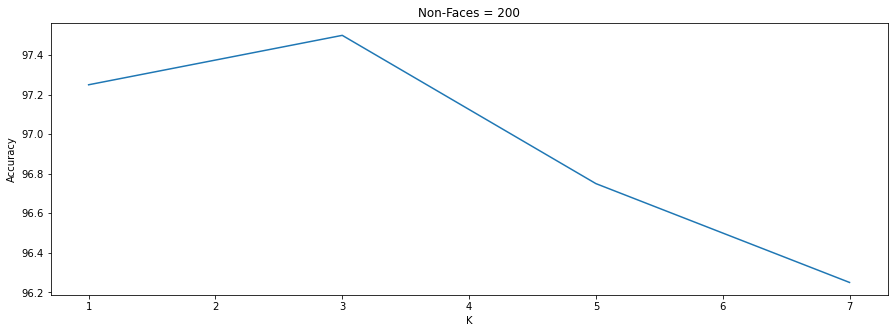

Accuracy at k=1 = 97.25 %
Accuracy at k=3 = 97.5 %
Accuracy at k=5 = 96.75 %
Accuracy at k=7 = 96.25 %
---------------------------------------------------------------


In [ ]:
# Plot K against Accuracy 
plt.figure(figsize=(15,5))
plt.plot(kk,accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title(f"Non-Faces = {NUM_NON_FACES}")
plt.show()
for j in range(len(kk)):
  print(f'Accuracy at k={kk[j]} = {accuracy[j]} %')
print('---------------------------------------------------------------')

In [ ]:
from numpy import genfromtxt

In [ ]:
non_faces_50 = genfromtxt('/content/accuracy_LDA_50_Non-Face.csv', delimiter=',')
non_faces_100 = genfromtxt('/content/accuracy_LDA_100_Non-Face.csv', delimiter=',')
non_faces_150 = genfromtxt('/content/accuracy_LDA_150_Non-Face.csv', delimiter=',')
non_faces_200 = genfromtxt('/content/accuracy_LDA_200_Non-Face.csv', delimiter=',')
non_faces_250 = genfromtxt('/content/accuracy_LDA_250_Non-Face.csv', delimiter=',')

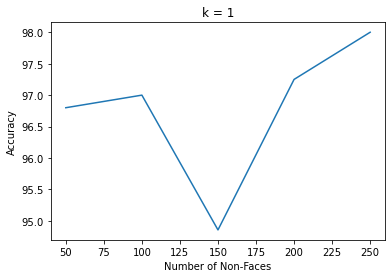

Accuracy at k=1, Num of Non-Faces=50 = 96.8 %
Accuracy at k=1, Num of Non-Faces=100 = 97.0 %
Accuracy at k=1, Num of Non-Faces=150 = 94.85714285714286 %
Accuracy at k=1, Num of Non-Faces=200 = 97.25 %
Accuracy at k=1, Num of Non-Faces=250 = 98.0 %
---------------------------------------------------------------


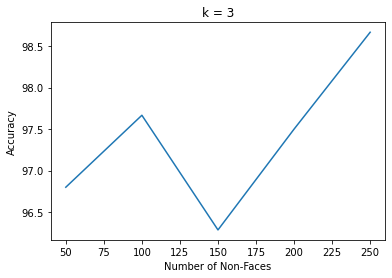

Accuracy at k=3, Num of Non-Faces=50 = 96.8 %
Accuracy at k=3, Num of Non-Faces=100 = 97.66666666666667 %
Accuracy at k=3, Num of Non-Faces=150 = 96.28571428571429 %
Accuracy at k=3, Num of Non-Faces=200 = 97.5 %
Accuracy at k=3, Num of Non-Faces=250 = 98.66666666666667 %
---------------------------------------------------------------


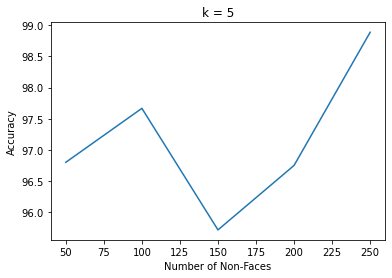

Accuracy at k=5, Num of Non-Faces=50 = 96.8 %
Accuracy at k=5, Num of Non-Faces=100 = 97.66666666666667 %
Accuracy at k=5, Num of Non-Faces=150 = 95.71428571428572 %
Accuracy at k=5, Num of Non-Faces=200 = 96.75 %
Accuracy at k=5, Num of Non-Faces=250 = 98.88888888888889 %
---------------------------------------------------------------


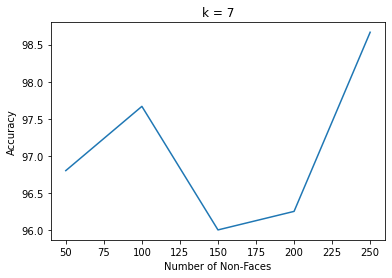

Accuracy at k=7, Num of Non-Faces=50 = 96.8 %
Accuracy at k=7, Num of Non-Faces=100 = 97.66666666666667 %
Accuracy at k=7, Num of Non-Faces=150 = 96.0 %
Accuracy at k=7, Num of Non-Faces=200 = 96.25 %
Accuracy at k=7, Num of Non-Faces=250 = 98.66666666666667 %
---------------------------------------------------------------


In [ ]:
 # Plot Accuracy against Number of Non-Faces at Constant K
NUM_FACES = [50,100,150,200,250]
for i in range(len(kk)): 
  plt.title(f'k = {kk[i]}')
  accuracies = []
  accuracies.append(non_faces_50[i])
  accuracies.append(non_faces_100[i])
  accuracies.append(non_faces_150[i])
  accuracies.append(non_faces_200[i])
  accuracies.append(non_faces_250[i])


  plt.plot(NUM_FACES,accuracies)
  plt.xlabel('Number of Non-Faces')
  plt.ylabel('Accuracy')
  plt.show()
  for j in range(len(NUM_FACES)):
    print(f'Accuracy at k={kk[i]}, Num of Non-Faces={NUM_FACES[j]} = {accuracies[j]} %')
  print('---------------------------------------------------------------')